In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('ClaimData.csv')
filtered = df['gender']!= 'DATA ERROR'
df =df.loc[filtered]
df

,Unnamed: 0,ClaimNumber,VehType,IncDate,gender,UWArea,IncType,TotalCost
0,1,49639,A,01/08/2014,M,Shadyville,Collision,2548.172914
1,2,49640,C,01/08/2014,F,Thetown,Collision,1580.958476
2,3,49641,E,01/08/2014,M,Other,Collision,3403.901623
3,4,49642,A,01/08/2014,M,Thetown,Collision,2863.939169
4,5,49643,C,01/08/2014,F,Thetown,Collision,2664.663930
...,...,...,...,...,...,...,...,...
45112,45113,94751,A,31/07/2016,M,Happievalley,Collision,2980.433511
45114,45115,94753,C,31/07/2016,F,Happievalley,Collision,1621.165205
45115,45116,94754,B,31/07/2016,F,Thetown,Collision,4052.075687
45116,45117,94755,C,31/07/2016,F,Happievalley,Collision,3718.534889


In [61]:
df.groupby(['IncType'])['TotalCost'].mean().to_frame()

,TotalCost
IncType,
Collision,3645.716875
Fire,6262.833869
Theft,6337.785400


In [62]:
for column in df.iloc[:,4:7]:
    print (column)
    print (df[column].value_counts())
    print("")

gender
F    22523
M    19874
Name: gender, dtype: int64

UWArea
Shadyville      12295
Thetown         11555
Other            9690
Happievalley     8857
Name: UWArea, dtype: int64

IncType
Collision    37110
Theft         4596
Fire           691
Name: IncType, dtype: int64



In [63]:
q1 = df.groupby(['IncType'])['UWArea'].value_counts(normalize = True)
q1

IncType    UWArea      
Collision  Thetown         0.287200
           Shadyville      0.250525
           Other           0.241822
           Happievalley    0.220453
Fire       Shadyville      0.283647
           Thetown         0.276411
           Happievalley    0.219971
           Other           0.219971
Theft      Shadyville      0.609661
           Thetown         0.153612
           Other           0.122715
           Happievalley    0.114012
Name: UWArea, dtype: float64

In [64]:
df['UWArea'].value_counts(normalize=True).to_frame()

,UWArea
Shadyville,0.289997
Thetown,0.272543
Other,0.228554
Happievalley,0.208906


In [65]:
grp = df.groupby(['IncType'])['UWArea'].value_counts(normalize = True).to_frame()
grp

UWArea
IncType   UWArea                
Collision Thetown       0.287200
          Shadyville    0.250525
          Other         0.241822
          Happievalley  0.220453
Fire      Shadyville    0.283647
          Thetown       0.276411
          Happievalley  0.219971
          Other         0.219971
Theft     Shadyville    0.609661
          Thetown       0.153612
          Other         0.122715
          Happievalley  0.114012

In [66]:
grp1 = df.groupby(['IncType'])['UWArea'].value_counts().to_frame()
grp1

UWArea
IncType   UWArea              
Collision Thetown        10658
          Shadyville      9297
          Other           8974
          Happievalley    8181
Fire      Shadyville       196
          Thetown          191
          Happievalley     152
          Other            152
Theft     Shadyville      2802
          Thetown          706
          Other            564
          Happievalley     524

In [67]:
def Inc_Type(incident):
    filt = df['IncType'] == incident 
    a = df.loc[filt].groupby(['UWArea'])['IncType'].value_counts().to_frame()
    a.rename(columns={'IncType':'Number'}, inplace=True)
    a.reset_index(inplace=True)
    a = a.sort_values(['Number'])
    return (a)

In [68]:
Collision = Inc_Type('Collision')
Collision

,UWArea,IncType,Number
0,Happievalley,Collision,8181
1,Other,Collision,8974
2,Shadyville,Collision,9297
3,Thetown,Collision,10658


In [69]:
Fire = Inc_Type('Fire')
Fire

,UWArea,IncType,Number
0,Happievalley,Fire,152
1,Other,Fire,152
3,Thetown,Fire,191
2,Shadyville,Fire,196


In [70]:
Theft = Inc_Type('Theft')
Theft

,UWArea,IncType,Number
0,Happievalley,Theft,524
1,Other,Theft,564
3,Thetown,Theft,706
2,Shadyville,Theft,2802


In [71]:
def diagram(a, b):
    y_ = a['Number'].to_list()
    x_ = a['UWArea']
    norm = [float(i)/sum(y_) for i in y_]
    fig, ax1 = plt.subplots(figsize=(10,6))
    color = 'tab:green'
    ax1.set_title('Frequency and chance of ' +b, fontsize=16)
    ax1.set_xlabel('Location', fontsize=16)
    ax1.set_ylabel('Frequency of '+b, fontsize=16, color=color)
    ax2 = sns.barplot(x=x_, y=y_)
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Percentage of '+b, fontsize=16, color=color)
    ax2 = sns.lineplot(x=x_, y=norm, color = 'black')
    ax2.tick_params(axis='y', color='black')
    return (plt.show())

**Visualise the incident rate for each vehicle**

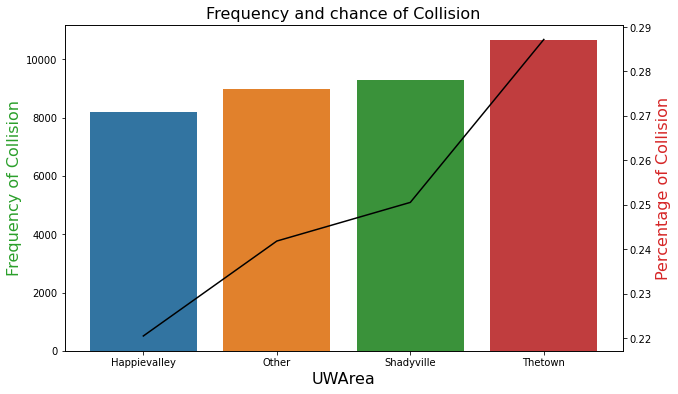

In [72]:
diagram(Collision, 'Collision')

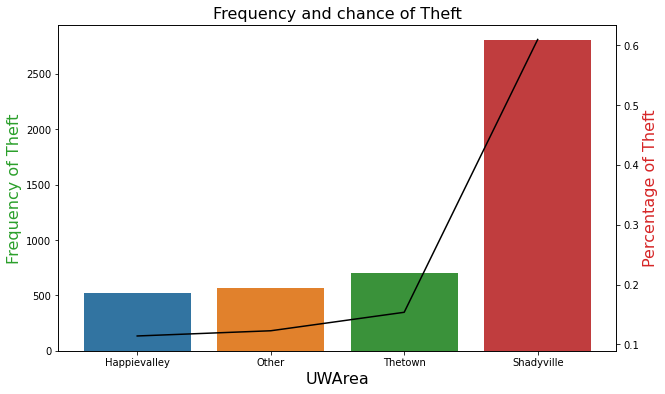

In [73]:
diagram(Theft, 'Theft')

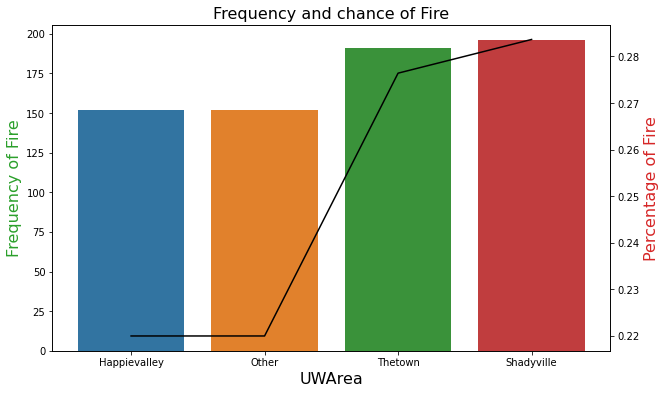

In [74]:
diagram(Fire,'Fire')

In [75]:
df_price = df[['UWArea','TotalCost']]
df_grp = df_price.groupby(['UWArea'], as_index = False).mean()
df_grp = df_grp.sort_values(by=['TotalCost'])
df_grp

,UWArea,TotalCost
1,Other,3854.651379
0,Happievalley,3868.671568
2,Shadyville,4010.575690
3,Thetown,4138.659376


(3850.0, 4150.0)

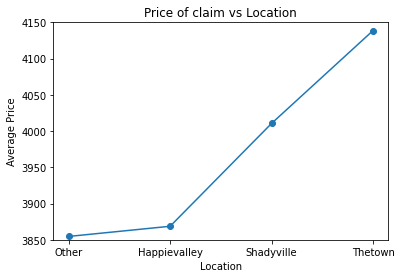

In [76]:
plt.scatter(x='UWArea',y='TotalCost', data = df_grp)
plt.plot('UWArea','TotalCost', data = df_grp)
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Price of claim vs Location')
axes = plt.gca()
axes.set_ylim([3850,4150])

**There is a clear trend of increasing claim cost with each location, due to incident type and each vehicle**

In [77]:
df_price = df[['UWArea','IncType','TotalCost']]
df_price_grp = df_price.groupby(['UWArea','IncType'], as_index=False).mean()
df_price_grp

,UWArea,IncType,TotalCost
0,Happievalley,Collision,3643.391511
1,Happievalley,Fire,6116.823647
2,Happievalley,Theft,6733.742232
3,Other,Collision,3632.907961
4,Other,Fire,6323.929391
5,Other,Theft,6717.408781
6,Shadyville,Collision,3382.300888
7,Shadyville,Fire,5764.231224
8,Shadyville,Theft,5972.515145
9,Thetown,Collision,3888.065293


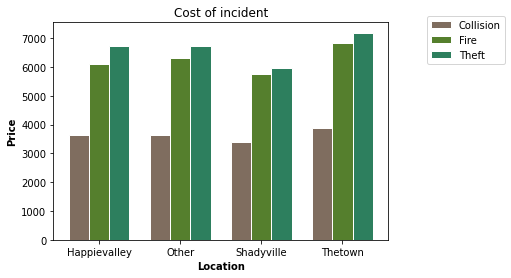

In [78]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25

bars1 = df_price_grp.iloc[::3,2].to_list()
bars2 = df_price_grp.iloc[1::3,2].to_list()
bars3 = df_price_grp.iloc[2::3,2].to_list()


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Collision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Fire')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Theft')

plt.xlabel('Location', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Happievalley', 'Other', 'Shadyville','Thetown'])
plt.title('Cost of incident')

plt.ylabel('Price', fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

**The average cost of each claim remains very similar, therefore implying the vehicle type involved in an incident causes the differing average cost of a claim for each location**

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


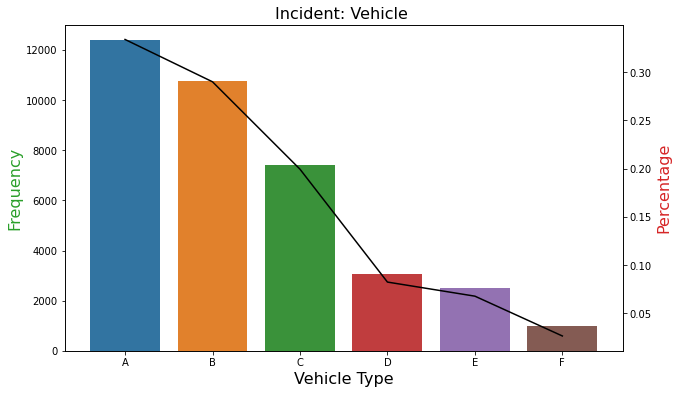

In [79]:

        
filt = (df['IncType']=='Collision')

veh_inc = df.loc[filt,'VehType'].value_counts().to_frame()
veh_inc.reset_index(inplace=True)
veh_inc=veh_inc.rename(columns={'index': 'Vehicle Type','VehType':'Frequency'}) 
        
veh_inc_norm = df.loc[filt,'VehType'].value_counts(normalize = True).to_frame()
veh_inc_norm.reset_index(inplace= True)
        
x = veh_inc['Vehicle Type']
y1 = veh_inc['Frequency']
y2 = veh_inc_norm['VehType']
        

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Incident: Vehicle ', fontsize=16)
ax1.set_xlabel('Vehicle Type', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16, color=color)
ax2 = sns.barplot(x, y1)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage', fontsize=16, color=color)
ax2 = sns.lineplot(x, y2, color = 'black')
ax2.tick_params(axis='y', color='black')
plt.show()

In [80]:
class filtering:
    def __init__(self, Inc,df):
        
        self.filt = (df['IncType']==Inc)

        self.veh_inc = df.loc[filt,'VehType'].value_counts().to_frame()
        self.veh_inc.reset_index(inplace=True)
        self.veh_inc=self.veh_inc.rename(columns={'index': 'Vehicle Type','VehType':'Frequency'}) 
        
        self.veh_inc_norm = df.loc[filt,'VehType'].value_counts(normalize = True).to_frame()
        self.veh_inc_norm.reset_index(inplace= True)
        
        self.x = self.veh_inc['Vehicle Type']
        self.y1 = self.veh_inc['Frequency']
        self.y2 = self.veh_inc_norm['VehType']
        
    def diagram_2(self, Inc):
        fig, ax1 = plt.subplots(figsize=(10,6))
        color = 'tab:green'
        ax1.set_title('Incident: Vehicle '+Inc, fontsize=16)
        ax1.set_xlabel('Vehicle Type', fontsize=16)
        ax1.set_ylabel('Frequency', fontsize=16, color=color)
        ax2 = sns.barplot(self.x, self.y1)
        ax1.tick_params(axis='y')
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Percentage', fontsize=16, color=color)
        ax2 = sns.lineplot(self.x, self.y2, color = 'black')
        ax2.tick_params(axis='y', color='black')
        plt.show()
        
        

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


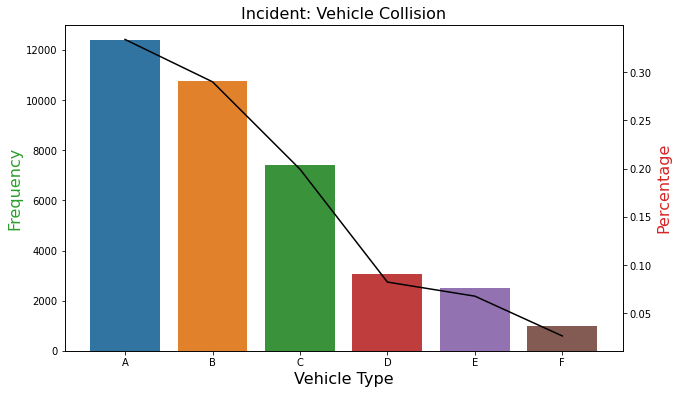

In [81]:
F = filtering('Collision',df)
res = F.diagram_2('Collision')

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


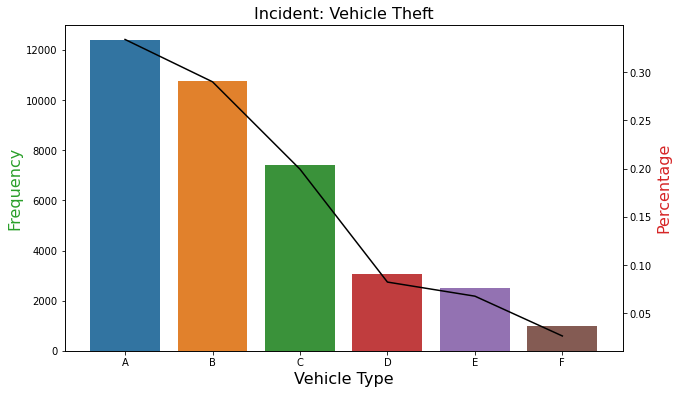

In [82]:
F = filtering('Theft',df)
res = F.diagram_2('Theft')

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


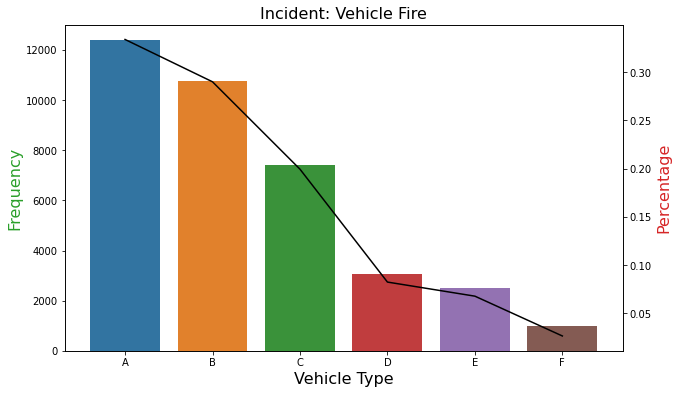

In [83]:
F = filtering('Fire',df)
res = F.diagram_2('Fire')

In [84]:
df_price = df[['VehType','TotalCost', 'IncType']]
df_grp = df_price.groupby(['VehType','IncType'], as_index = False).mean()
df_grp = df_grp.sort_values(by=['IncType'])
df_grp 

,VehType,IncType,TotalCost
0,A,Collision,3226.055385
15,F,Collision,4774.003424
3,B,Collision,3737.926320
6,C,Collision,3642.418507
9,D,Collision,4159.844577
12,E,Collision,4259.858180
1,A,Fire,5255.554677
4,B,Fire,6151.587666
7,C,Fire,5557.089499
16,F,Fire,7282.345031


In [27]:
fire = df_grp['IncType']=='Fire'
x_fire = df_grp.loc[fire]
x_fire = x_fire.rename(columns={'TotalCost':'Fire'})
theft = df_grp['IncType']=='Theft'
x_theft = df_grp.loc[theft]
x_theft = x_theft.rename(columns={'TotalCost':'Theft'})
collision = df_grp['IncType']=='Collision'
x_collision = df_grp.loc[collision]
x_collision =x_collision.rename(columns={'TotalCost':'Collision'})

In [28]:
df_price_avg = df[['VehType','TotalCost']]
df_grp_avg = df_price_avg.groupby(['VehType'], as_index = False).mean()
df_grp_avg = df_grp_avg.sort_values(by=['VehType'])
df_grp_avg=df_grp_avg.rename(columns={'TotalCost':'Average Cost'})
df_grp_avg

,VehType,Average Cost
0,A,3340.451224
1,B,3887.370806
2,C,3785.880169
3,D,4559.177242
4,E,4869.147776
5,F,6393.937523


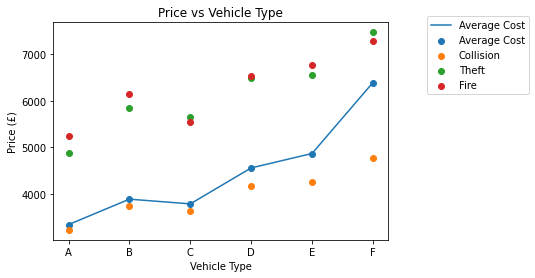

In [29]:
plt.scatter(x = 'VehType',y='Average Cost', data =df_grp_avg)
plt.plot('VehType','Average Cost', data = df_grp_avg)

plt.scatter(x='VehType',y='Collision', data = x_collision)


plt.scatter(x='VehType',y='Theft', data = x_theft)


plt.scatter(x='VehType',y='Fire', data = x_fire)

plt.xlabel('Vehicle Type')
plt.ylabel('Price (£)')
plt.title('Price vs Vehicle Type')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [30]:
from scipy.stats import norm
date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y')


df = pd.read_csv('ClaimData.csv', parse_dates=True, date_parser=date_parser, index_col='IncDate')\
       .drop(columns=['Unnamed: 0'])

In [31]:
filt = (df['IncType']=='Collision')
df_repair = df.loc[filt]
df_repair

,ClaimNumber,VehType,gender,UWArea,IncType,TotalCost
IncDate,,,,,,
2014-08-01,49639,A,M,Shadyville,Collision,2548.172914
2014-08-01,49640,C,F,Thetown,Collision,1580.958476
2014-08-01,49641,E,M,Other,Collision,3403.901623
2014-08-01,49642,A,M,Thetown,Collision,2863.939169
2014-08-01,49643,C,F,Thetown,Collision,2664.663930
...,...,...,...,...,...,...
2016-07-31,94752,B,DATA ERROR,Thetown,Collision,4180.324139
2016-07-31,94753,C,F,Happievalley,Collision,1621.165205
2016-07-31,94754,B,F,Thetown,Collision,4052.075687


In [32]:
import statsmodels.stats.api as sms
def repair_costs(vec):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    df_collision_ = df[(df.IncType== 'Collision') & (df.VehType==vec )& (df.TotalCost>1)]

    ax.scatter(df_collision_.index, df_collision_.TotalCost, alpha=.5)


    ax.plot(df_collision_.TotalCost.resample('M').mean(), lw=3, ls='--', c='r', label='Monthly Mean')
    f = df_collision_.TotalCost.resample('M').mean()
    ax.legend()

    ax.set_title('Repair Costs for Vehicle '+vec)
    ax.set_ylabel('Cost (£)')
    ax.set_xlabel('Date')
    
    # assume std is equal 
    pooled_std = df_collision_[:'2014-11-01'].TotalCost.std()
    
    post_2016_cost = df_collision_['2016-03-01':].TotalCost
    post_2016_mean = df_collision_['2016-03-01':].TotalCost.mean()
    pre_2015_cost = df_repair[:'2014-11-01'].TotalCost

    # CI for post-2015 mean 
    #[pre_2015_cost.mean() + pooled_std * norm.ppf(q) * (1/pre_2015_cost.size + 1/post_2016_cost.size)**.5 for q in [.005, .995]]#norm outputs a standard deviation multiplier in which 99.5% of data will lie within
    ci = sms.DescrStatsW(pre_2015_cost).tconfint_mean()
    if post_2016_mean>ci[0] or post_2016_mean>ci[1]:
        print ('Repair costs have changed significantly')
    else:
        print ('Repair costs have not changed significantly')

**I then decided to analyse how repair costs change over the timeframe given and use a CI analysis to determine if this change is significant**

Repair costs have not changed significantly


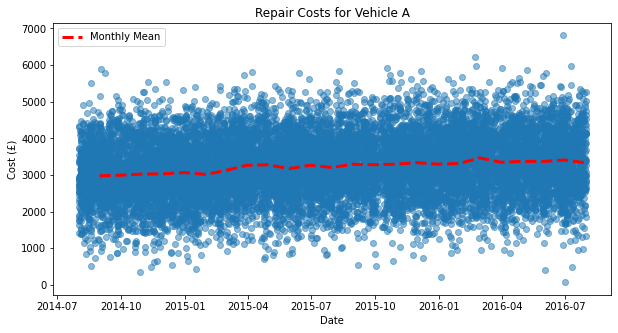

In [33]:
repair_costs('A')



Repair costs have changed significantly


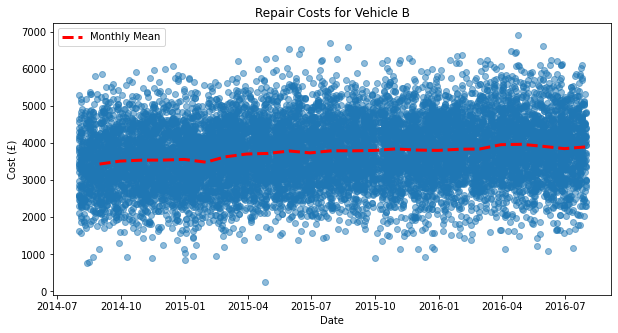

In [34]:
repair_costs('B')

Repair costs have changed significantly


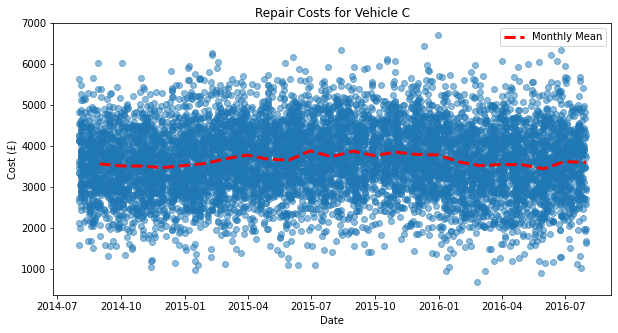

In [35]:
repair_costs('C')

Repair costs have changed significantly


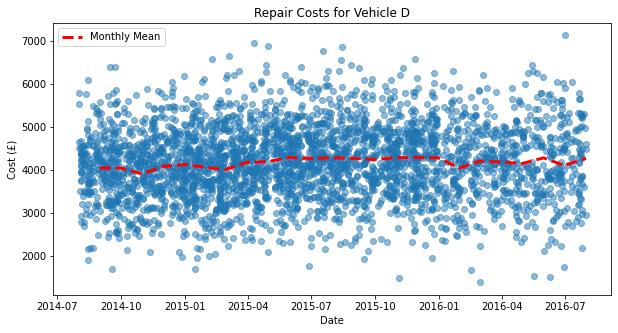

In [36]:
repair_costs('D')

Repair costs have changed significantly


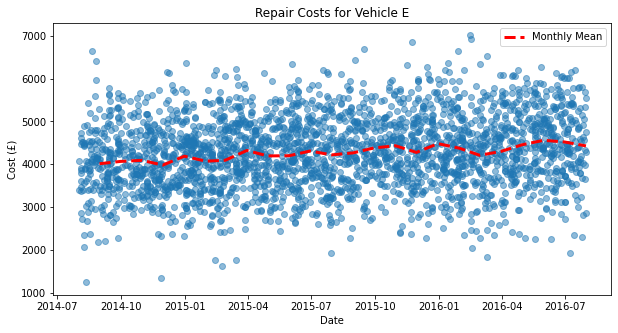

In [37]:
repair_costs('E')

Repair costs have changed significantly


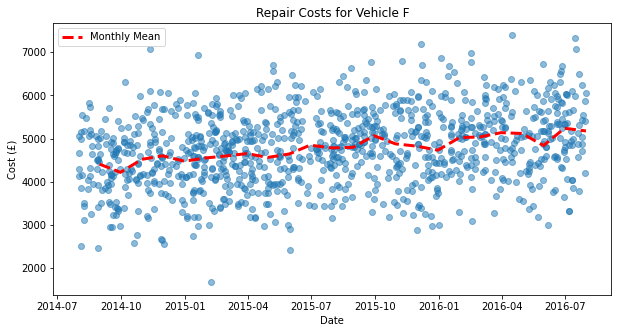

In [38]:
repair_costs('F')

**Build a ML system that can predict what incident a vehichle is involved in**

In [43]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['UWArea'] = df['UWArea'].replace({'Happievalley': 0, 'Other': 1, 'Thetown': 2, 'Shadyville': 3})
df['VehType'] = df['VehType'].replace({'A': 0, 'B': 1,'C':2,'D':3,'E':4,'F':5})
df['IncType'] = df['IncType'].replace({'Collision': 1, 'Fire': 2, 'Theft': 3})
df

,Unnamed: 0,ClaimNumber,VehType,IncDate,gender,UWArea,IncType,TotalCost
0,1,49639,0,01/08/2014,1,3,1,2548.172914
1,2,49640,2,01/08/2014,0,2,1,1580.958476
2,3,49641,4,01/08/2014,1,1,1,3403.901623
3,4,49642,0,01/08/2014,1,2,1,2863.939169
4,5,49643,2,01/08/2014,0,2,1,2664.663930
...,...,...,...,...,...,...,...,...
45112,45113,94751,0,31/07/2016,1,0,1,2980.433511
45114,45115,94753,2,31/07/2016,0,0,1,1621.165205
45115,45116,94754,1,31/07/2016,0,2,1,4052.075687
45116,45117,94755,2,31/07/2016,0,0,1,3718.534889


In [44]:
X = df[['VehType','gender','UWArea']]
Y = df['IncType']

In [45]:
from sklearn import preprocessing 
X= preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [46]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29677, 3) (29677,)
Test set: (12720, 3) (12720,)


In [47]:
df['IncType'].value_counts(normalize = True)

1    0.875298
3    0.108404
2    0.016298
Name: IncType, dtype: float64

In [48]:
from sklearn.metrics import confusion_matrix
import itertools
def con_mat_plot(matrix, classes, type_of_svm):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix of ' + str(type_of_svm))
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=50)
    plt.yticks(ticks, classes)
    threshold = matrix.max()/2.
    
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], '.2f'), horizontalalignment="center", 
                 color="white" if matrix[i, j] > threshold else "black")
    
    
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [49]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)


print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))
print("SVM f1: ", f1_score(y_test, yhat_svm, average = 'weighted'))

SVM's Accuracy:  0.8889937106918239
SVM f1:  0.8501671090901131


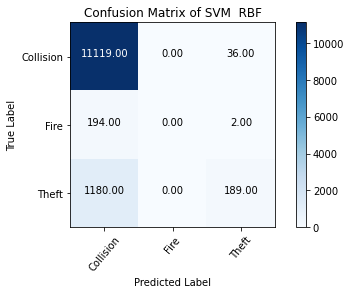

In [50]:
matrix = confusion_matrix(y_test, yhat_svm, labels=[1, 2,3])

con_mat_plot(matrix, ['Collision','Fire','Theft'], 'SVM  RBF')

SVM's Accuracy:  0.8769654088050315
SVM f1:  0.8194805558299583


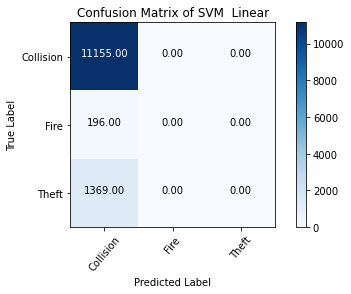

In [51]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)


print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))
print("SVM f1: ", f1_score(y_test, yhat_svm, average = 'weighted'))

matrix = confusion_matrix(y_test, yhat_svm, labels=[1, 2,3])

con_mat_plot(matrix, ['Collision','Fire','Theft'], 'SVM  Linear')

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

F1 score for KNN with 1 neighbours 0.7995449288219649
F1 score for KNN with 2 neighbours 0.842479103353527
F1 score for KNN with 3 neighbours 0.8628611593075514
F1 score for KNN with 4 neighbours 0.858243437891341
F1 score for KNN with 5 neighbours 0.8649737081361152
F1 score for KNN with 6 neighbours 0.8649737081361152
F1 score for KNN with 7 neighbours 0.8666924805494546
F1 score for KNN with 8 neighbours 0.8666924805494546
F1 score for KNN with 9 neighbours 0.8666924805494546
F1 score for KNN with 10 neighbours 0.8649737081361152
F1 score for KNN with 11 neighbours 0.8649737081361152


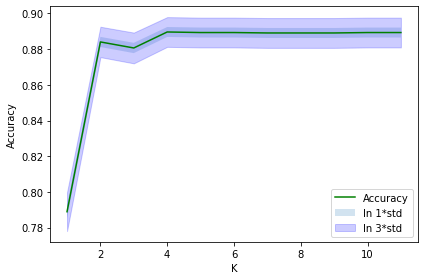

In [53]:
# Initialising Variables
k_to_try = 12
means = np.zeros((k_to_try-1))
stds = np.zeros((k_to_try-1))

# Fitting KNN Model for each k, saving down the mean and standard deviation of the accuracy
for i in range(1, k_to_try):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predicted = knn.predict(X_test)
    means[i-1]=metrics.accuracy_score(y_test, predicted)
    stds[i-1]=np.std(predicted == y_test)/np.sqrt(predicted.shape[0])
    print ('F1 score for KNN with ' +str(i)+' neighbours', f1_score(y_test, predicted, average= 'weighted'))

    
# Plotting accuracy along side +/- 1 and 3 stds
plt.plot(range(1, k_to_try), means, 'g')
plt.fill_between(range(1, k_to_try), means-1*stds, means+1*stds, alpha=0.2)
plt.fill_between(range(1, k_to_try), means-3*stds, means+3*stds, alpha=0.2, color="blue")
plt.legend(('Accuracy', 'In 1*std', 'In 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

DecisionTrees's Accuracy:  0.8896226415094339
DecisionTrees's f1:  0.858243437891341


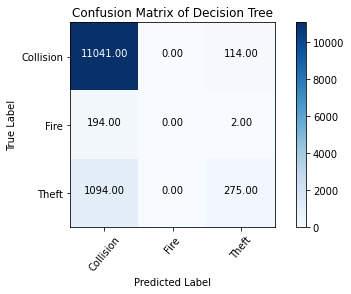

In [54]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTrees's f1: ", f1_score(y_test, predTree, average = 'weighted'))

matrix = confusion_matrix(y_test, predTree, labels=[1, 2,3])

con_mat_plot(matrix, ['Collision', 'Fire', 'Theft'], 'Decision Tree')

In [55]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()
log_regr.fit(X_train, y_train)


LogisticRegression()

F1 score for logistic regression:  0.8501671090901131
Logistic Regression Accuracy:  0.8896226415094339


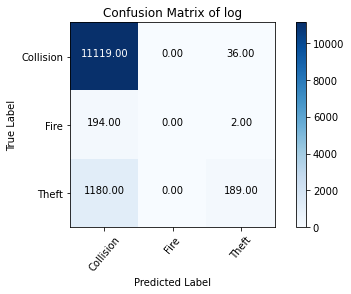

In [56]:
ans= log_regr.predict(X_test)
from sklearn.metrics import f1_score
print ('F1 score for logistic regression: ', f1_score(y_test, ans, average= 'weighted'))
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, predTree))
matrix = confusion_matrix(y_test, ans, labels=[1, 2,3])

con_mat_plot(matrix, ['Collision', 'Fire', 'Theft'], 'log')